# МОДЕЛИРОВАНИЕ №2 - ПРИБЫЛЬ

In [1]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu120.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu120.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpiztanxpo
  JVM stdout: /tmp/tmpiztanxpo/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpiztanxpo/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/GMT
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.2
H2O_cluster_version_age:,2 months and 13 days
H2O_cluster_name:,H2O_from_python_unknownUser_21eamx
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.926 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [2]:
#file = '/content/drive/MyDrive/Colab Notebooks/Diplom/df4eda2clean2.csv'
file = 'df2prep4regressionV2.csv'
df = h2o.import_file(file)
df = df.drop('C1')
df = df.drop('Model_id')
# ZIP удалю, до продажи я не знаю куда он пойдет этот товар
df = df.drop('Zip')
# то же самое с Units
df = df.drop('Units')
df

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Revenue_T,Manufacturer,MonthNo,Model_id_number,CategoryInSegmentInCompete
31676.4,Natura,12,44,UrbanConvenienceNotCompete
11020.6,Pirum,12,32,RuralProductivityNotCompete
11020.6,Pirum,12,31,RuralProductivityNotCompete
35010.4,VanArsdel,12,94,UrbanModerationIsCompete
16441.1,Currus,12,8,RuralSelectNotCompete
35541.4,Abbas,12,33,UrbanModerationIsCompete
2518.74,Natura,12,14,YouthYouthNotCompete
2518.74,Natura,12,14,YouthYouthNotCompete
9070.74,Quibus,12,4,RuralSelectNotCompete
28348.7,VanArsdel,12,70,UrbanModerationIsCompete


In [3]:
train, valid, unseen = df.split_frame(ratios=[0.7, 0.15])

In [4]:
train

Revenue_T,Manufacturer,MonthNo,Model_id_number,CategoryInSegmentInCompete
31676.4,Natura,12,44,UrbanConvenienceNotCompete
11020.6,Pirum,12,32,RuralProductivityNotCompete
11020.6,Pirum,12,31,RuralProductivityNotCompete
35010.4,VanArsdel,12,94,UrbanModerationIsCompete
16441.1,Currus,12,8,RuralSelectNotCompete
35541.4,Abbas,12,33,UrbanModerationIsCompete
2518.74,Natura,12,14,YouthYouthNotCompete
2518.74,Natura,12,14,YouthYouthNotCompete
9070.74,Quibus,12,4,RuralSelectNotCompete
10382.4,Natura,12,26,UrbanConvenienceNotCompete


In [5]:
valid

Revenue_T,Manufacturer,MonthNo,Model_id_number,CategoryInSegmentInCompete
14615.4,Natura,12,10,UrbanModerationIsCompete
9128.7,Aliqui,12,5,UrbanExtremeNotCompete
12851.4,VanArsdel,12,54,UrbanModerationIsCompete
12851.4,VanArsdel,12,54,UrbanModerationIsCompete
16316.4,VanArsdel,12,11,UrbanModerationIsCompete
16316.4,VanArsdel,12,11,UrbanModerationIsCompete
16316.4,VanArsdel,12,11,UrbanModerationIsCompete
16316.4,VanArsdel,12,11,UrbanModerationIsCompete
16316.4,VanArsdel,12,11,UrbanModerationIsCompete
16316.4,VanArsdel,12,11,UrbanModerationIsCompete


In [6]:
unseen

Revenue_T,Manufacturer,MonthNo,Model_id_number,CategoryInSegmentInCompete
28348.7,VanArsdel,12,70,UrbanModerationIsCompete
9058.14,Currus,12,5,MixAll SeasonNotCompete
26458.7,Natura,12,18,UrbanModerationIsCompete
6708.87,VanArsdel,12,69,UrbanConvenienceNotCompete
7553.7,Natura,12,36,UrbanExtremeNotCompete
6923.7,Aliqui,12,6,UrbanExtremeNotCompete
12851.4,VanArsdel,12,54,UrbanModerationIsCompete
7370.37,Currus,12,5,UrbanExtremeNotCompete
16316.4,VanArsdel,12,11,UrbanModerationIsCompete
16316.4,VanArsdel,12,11,UrbanModerationIsCompete


In [7]:
y = "Revenue_T"
x=train.columns
x.remove(y)

# Тренировка модели

In [8]:
aml = H2OAutoML(max_models = 10, seed = 1)
aml.train(x = x, y = y,  training_frame = train, validation_frame = valid)

AutoML progress: |
11:19:39.417: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),4/10
# GBM base models (used / total),2/4
# XGBoost base models (used / total),2/3
# DRF base models (used / total),0/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [9]:
lb = aml.leaderboard
lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20231009_111939,2065.07,4.26452e+06,463.476,0.157647,4.26452e+06
StackedEnsemble_BestOfFamily_1_AutoML_1_20231009_111939,2066.25,4.26939e+06,464.543,0.15815,4.26939e+06
XGBoost_1_AutoML_1_20231009_111939,2069.53,4.28296e+06,452.564,nan,4.28296e+06
XGBoost_2_AutoML_1_20231009_111939,2071.79,4.2923e+06,472.302,0.160547,4.2923e+06
GBM_4_AutoML_1_20231009_111939,2091.94,4.37621e+06,552.719,0.179403,4.37621e+06
GBM_1_AutoML_1_20231009_111939,2101.71,4.41716e+06,531.691,0.172974,4.41716e+06
XGBoost_3_AutoML_1_20231009_111939,2111.97,4.46042e+06,582.68,0.190183,4.46042e+06
GBM_3_AutoML_1_20231009_111939,2141.65,4.58665e+06,647.682,0.208842,4.58665e+06
GBM_2_AutoML_1_20231009_111939,2186.89,4.78247e+06,717.236,0.229097,4.78247e+06
DRF_1_AutoML_1_20231009_111939,2458.11,6.04231e+06,1098.98,0.33304,6.04231e+06


In [10]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(lb['model_id'].as_data_frame().iloc[:,0])
model_ids

['StackedEnsemble_AllModels_1_AutoML_1_20231009_111939',
 'StackedEnsemble_BestOfFamily_1_AutoML_1_20231009_111939',
 'XGBoost_1_AutoML_1_20231009_111939',
 'XGBoost_2_AutoML_1_20231009_111939',
 'GBM_4_AutoML_1_20231009_111939',
 'GBM_1_AutoML_1_20231009_111939',
 'XGBoost_3_AutoML_1_20231009_111939',
 'GBM_3_AutoML_1_20231009_111939',
 'GBM_2_AutoML_1_20231009_111939',
 'DRF_1_AutoML_1_20231009_111939',
 'XRT_1_AutoML_1_20231009_111939',
 'GLM_1_AutoML_1_20231009_111939']

In [11]:
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
se

key,value
Stacking strategy,cross_validation
Number of base models (used / total),4/10
# GBM base models (used / total),2/4
# XGBoost base models (used / total),2/3
# DRF base models (used / total),0/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [12]:
# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(se.metalearner()['name'])

/usr/local/lib/python3.8/dist-packages/h2o/estimators/stackedensemble.py:925: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  warnings.warn(


In [13]:
metalearner.coef_norm()

{'Intercept': 5756.47341270173,
 'XGBoost_1_AutoML_1_20231009_111939': 2091.722597363333,
 'XGBoost_2_AutoML_1_20231009_111939': 1124.7258522688717,
 'GBM_4_AutoML_1_20231009_111939': 206.37682494091038,
 'GBM_1_AutoML_1_20231009_111939': 720.6988916828835,
 'XGBoost_3_AutoML_1_20231009_111939': 0.0,
 'GBM_3_AutoML_1_20231009_111939': 0.0,
 'GBM_2_AutoML_1_20231009_111939': 0.0,
 'DRF_1_AutoML_1_20231009_111939': 0.0,
 'XRT_1_AutoML_1_20231009_111939': 0.0,
 'GLM_1_AutoML_1_20231009_111939': 0.0}

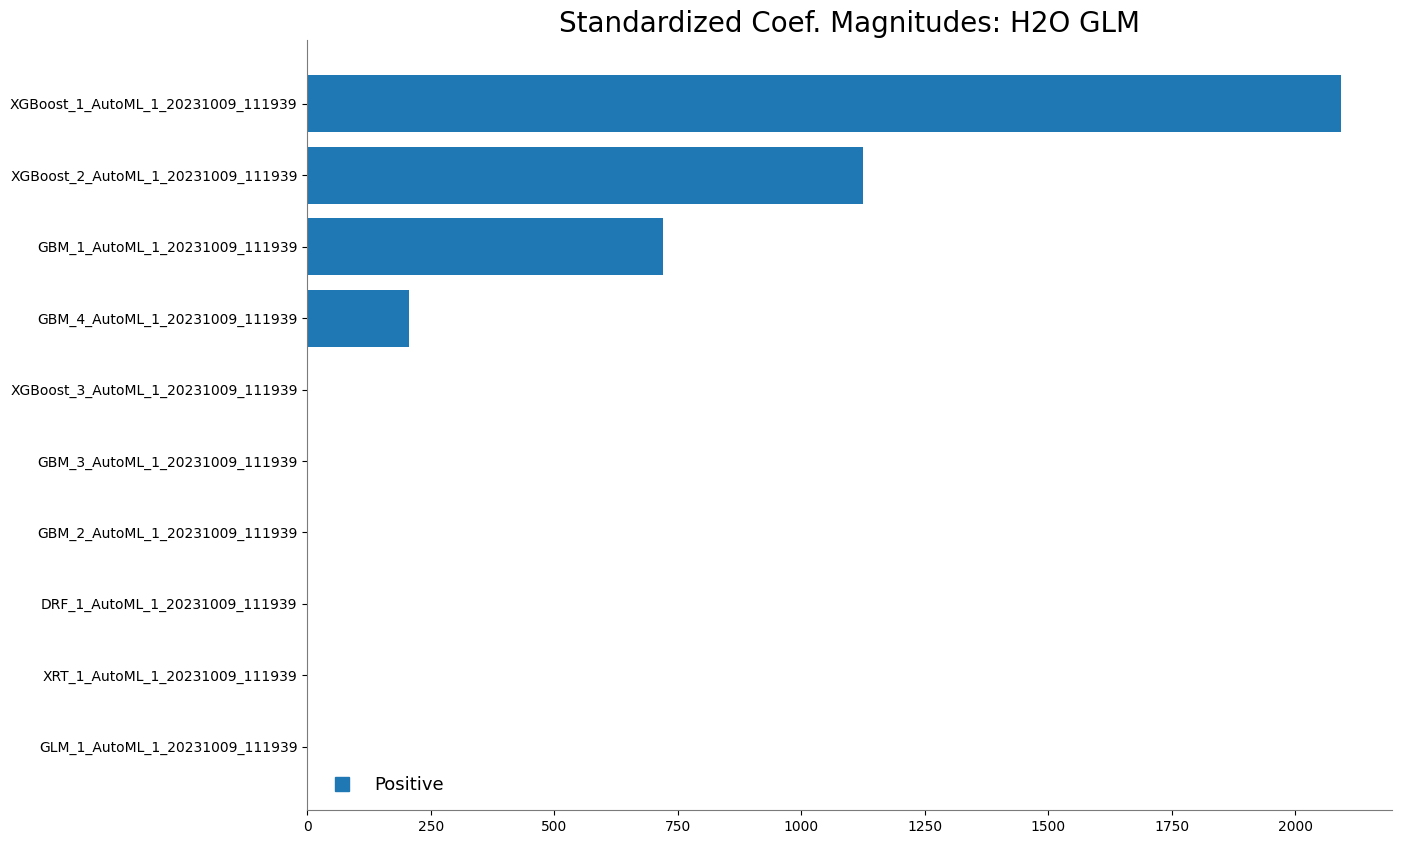

In [14]:
%matplotlib inline
metalearner.std_coef_plot()

# Что с важностью признаков

Model ID: StackedEnsemble_AllModels_1_AutoML_1_20231009_111939
StackedEnsemble_AllModels_1_AutoML_1_20231009_111939 - ERROR PLOTTING
Model ID: StackedEnsemble_BestOfFamily_1_AutoML_1_20231009_111939
StackedEnsemble_BestOfFamily_1_AutoML_1_20231009_111939 - ERROR PLOTTING
Model ID: XGBoost_1_AutoML_1_20231009_111939


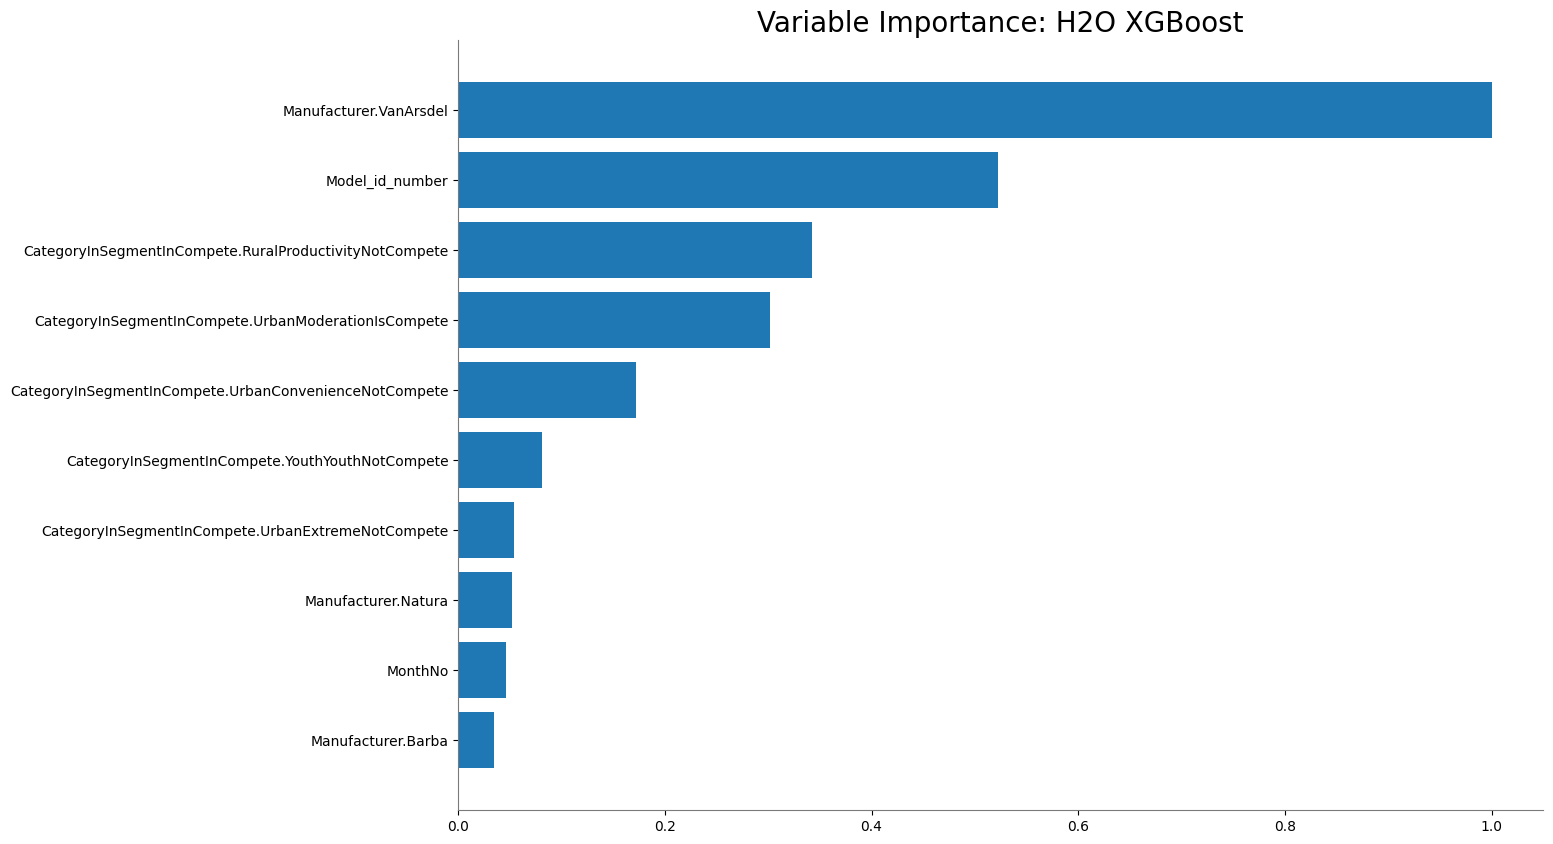

Model ID: XGBoost_2_AutoML_1_20231009_111939


<Figure size 640x480 with 0 Axes>

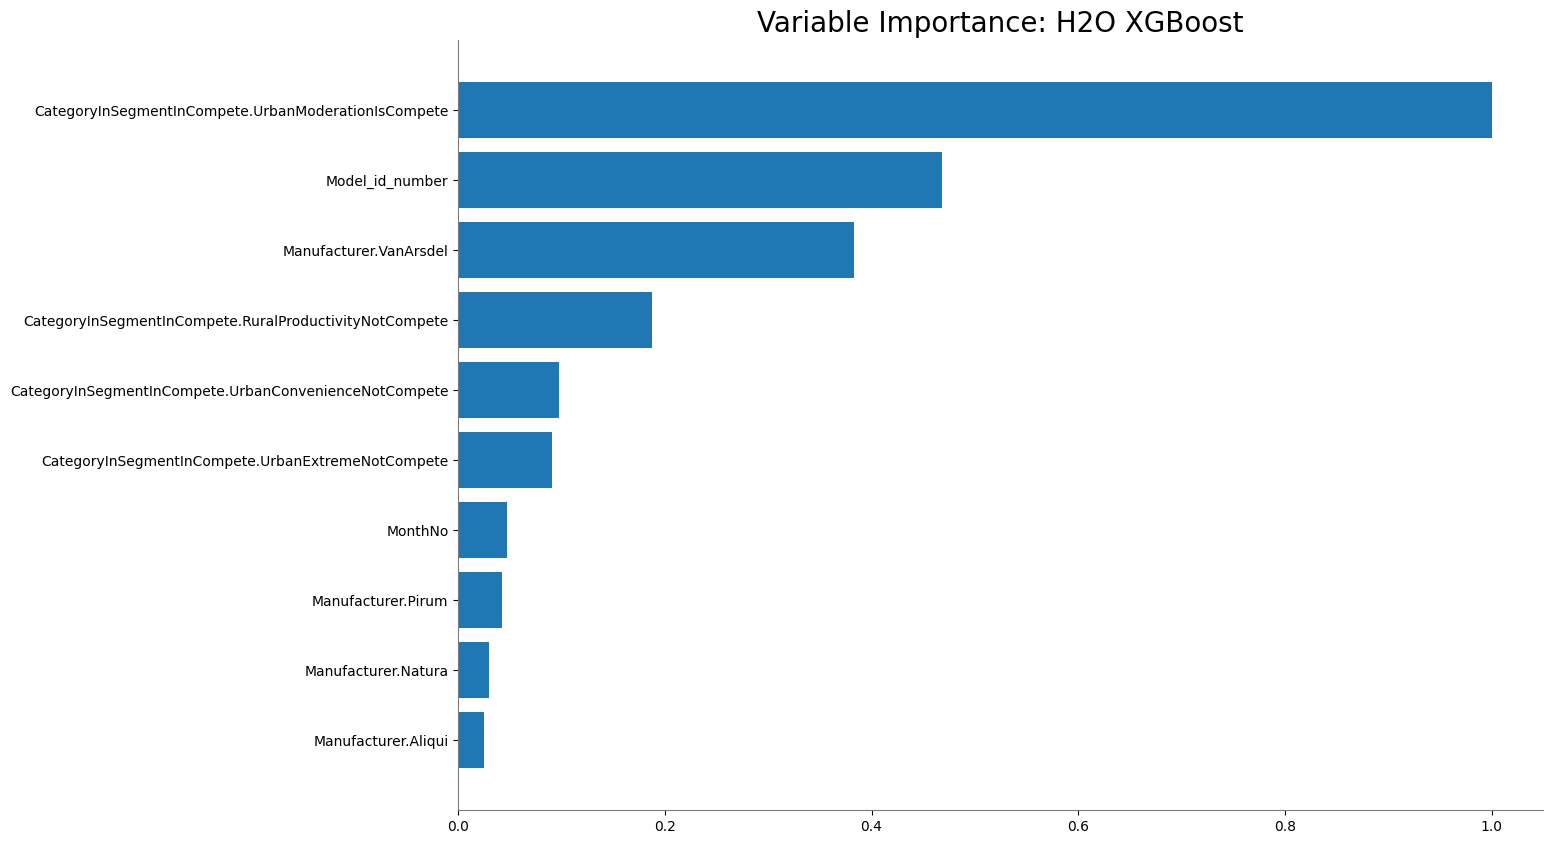

Model ID: GBM_4_AutoML_1_20231009_111939


<Figure size 640x480 with 0 Axes>

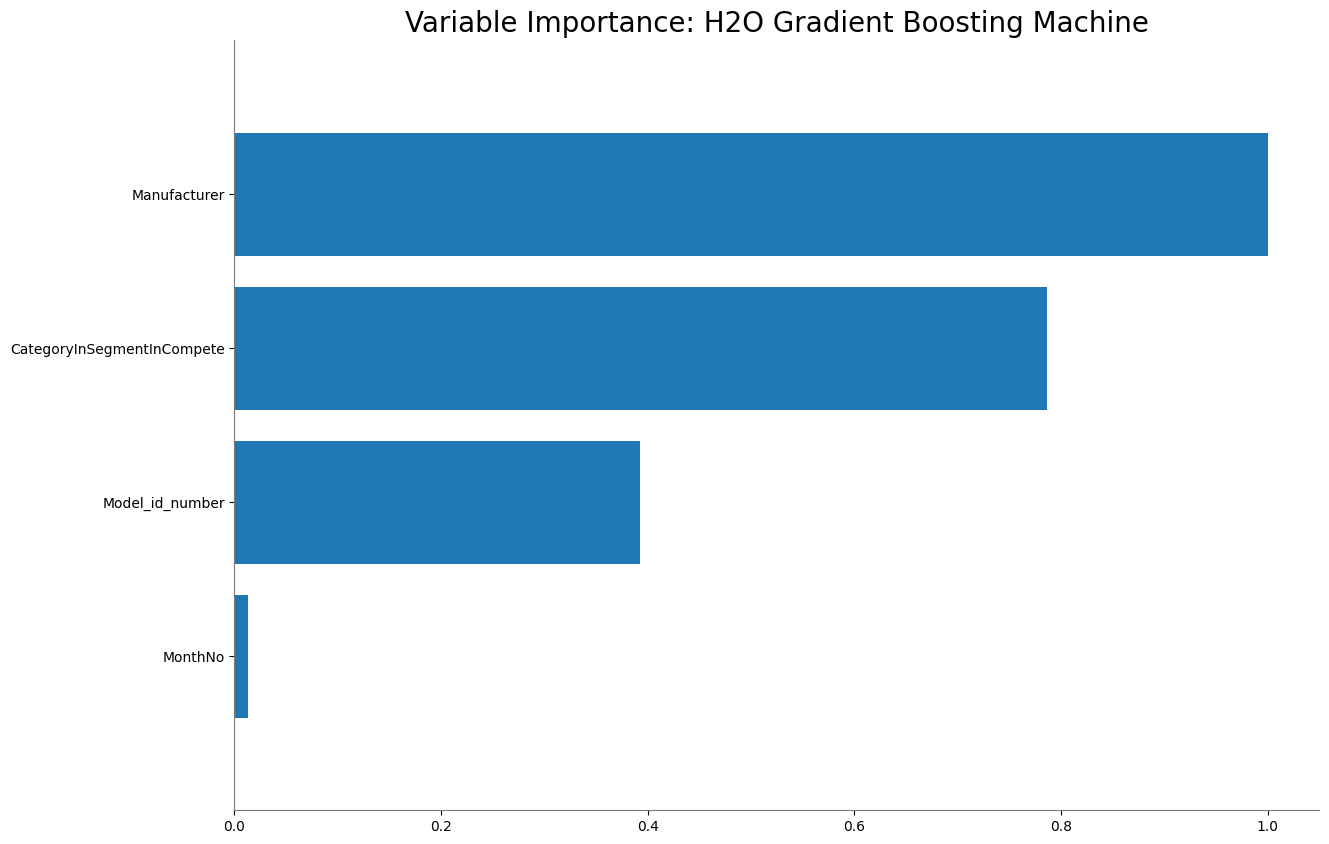

Model ID: GBM_1_AutoML_1_20231009_111939


<Figure size 640x480 with 0 Axes>

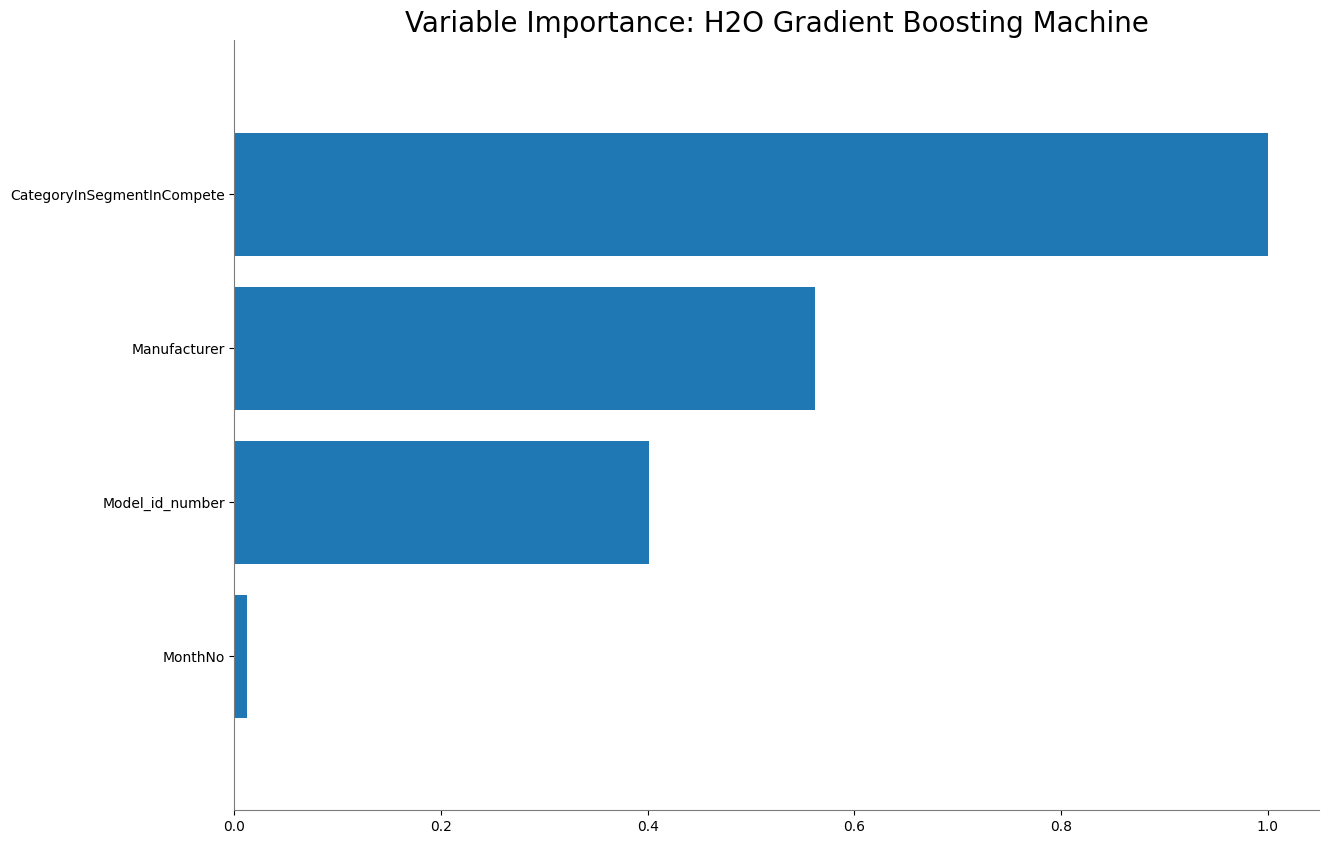

Model ID: XGBoost_3_AutoML_1_20231009_111939


<Figure size 640x480 with 0 Axes>

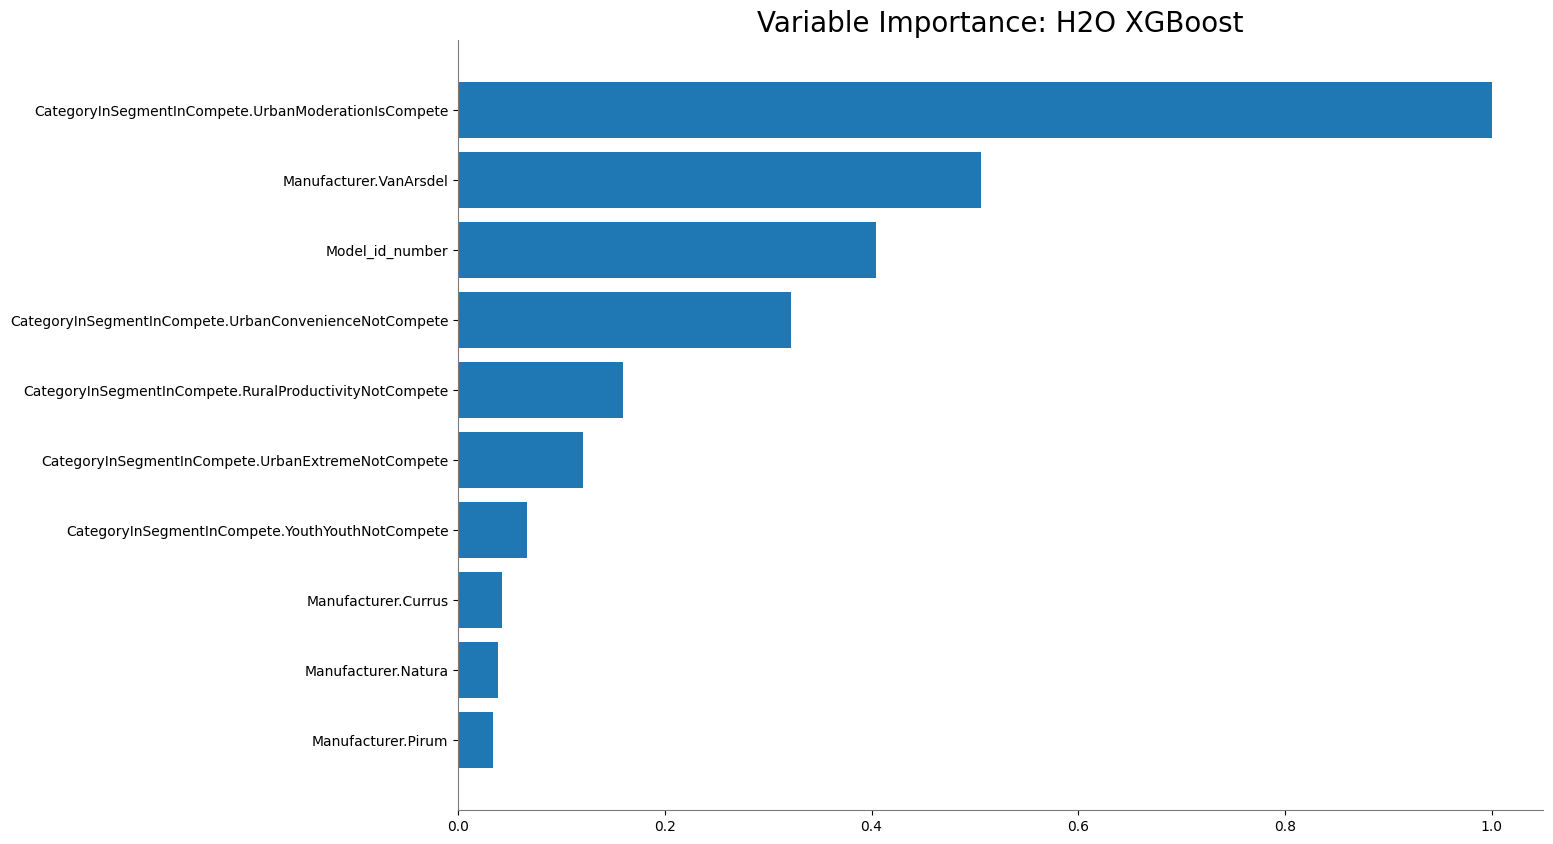

Model ID: GBM_3_AutoML_1_20231009_111939


<Figure size 640x480 with 0 Axes>

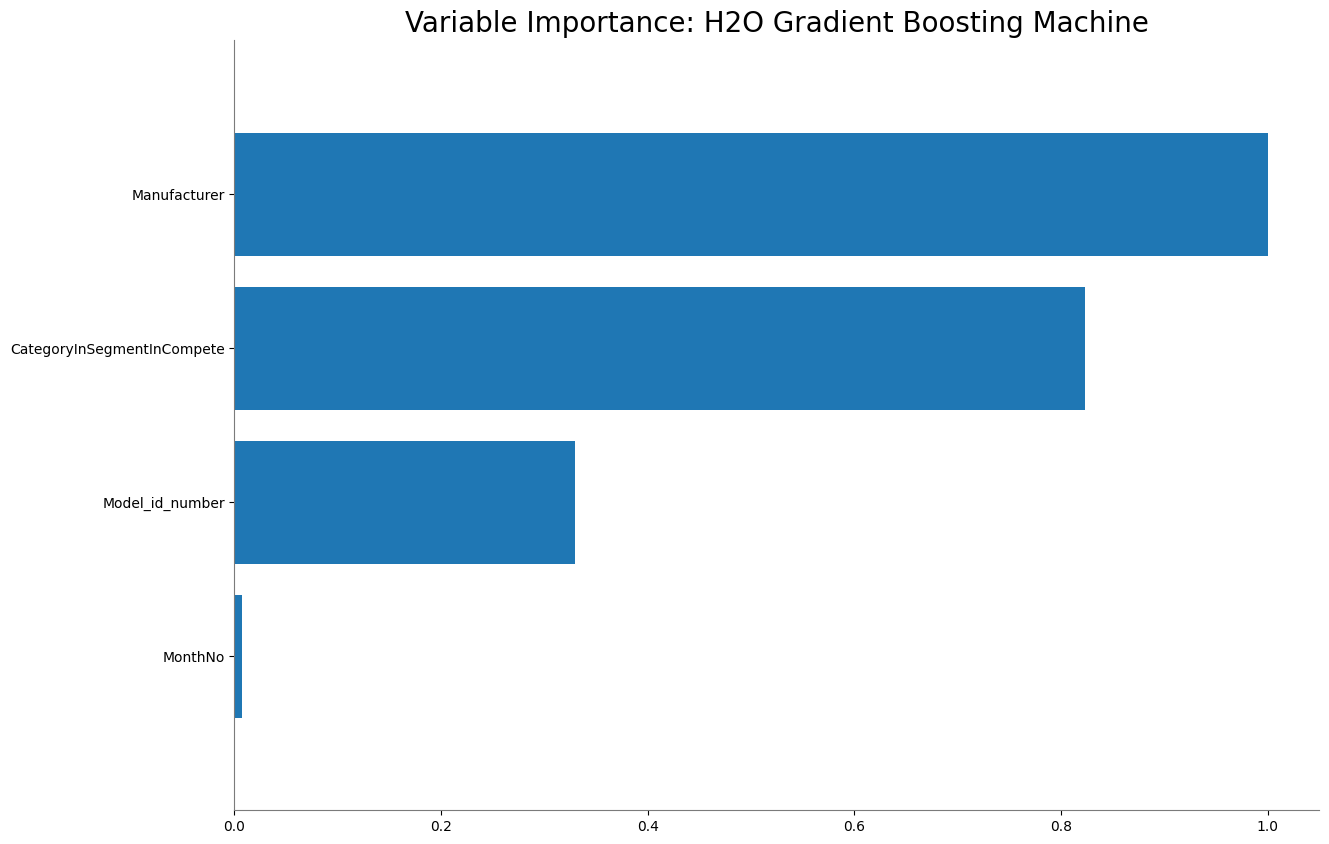

Model ID: GBM_2_AutoML_1_20231009_111939


<Figure size 640x480 with 0 Axes>

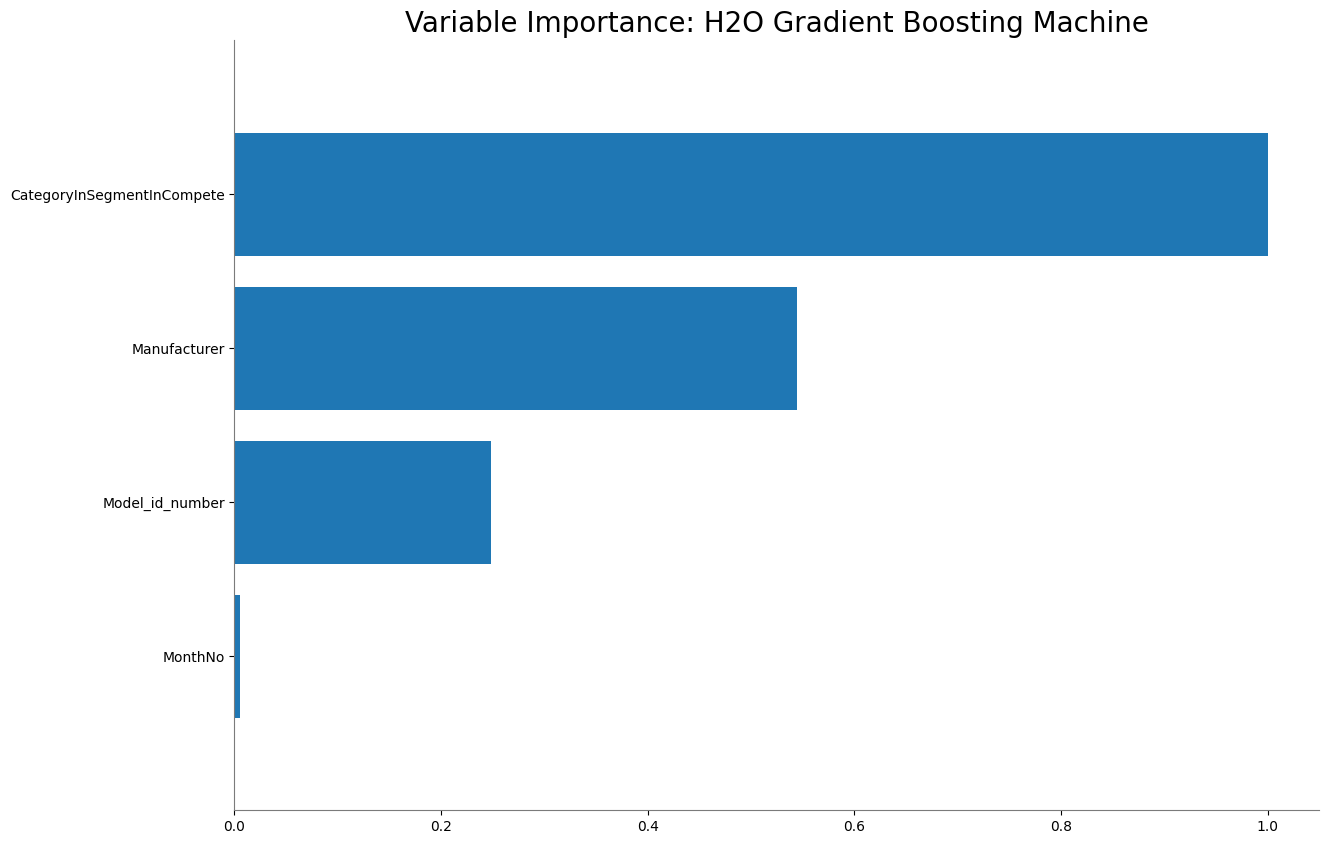

Model ID: DRF_1_AutoML_1_20231009_111939


<Figure size 640x480 with 0 Axes>

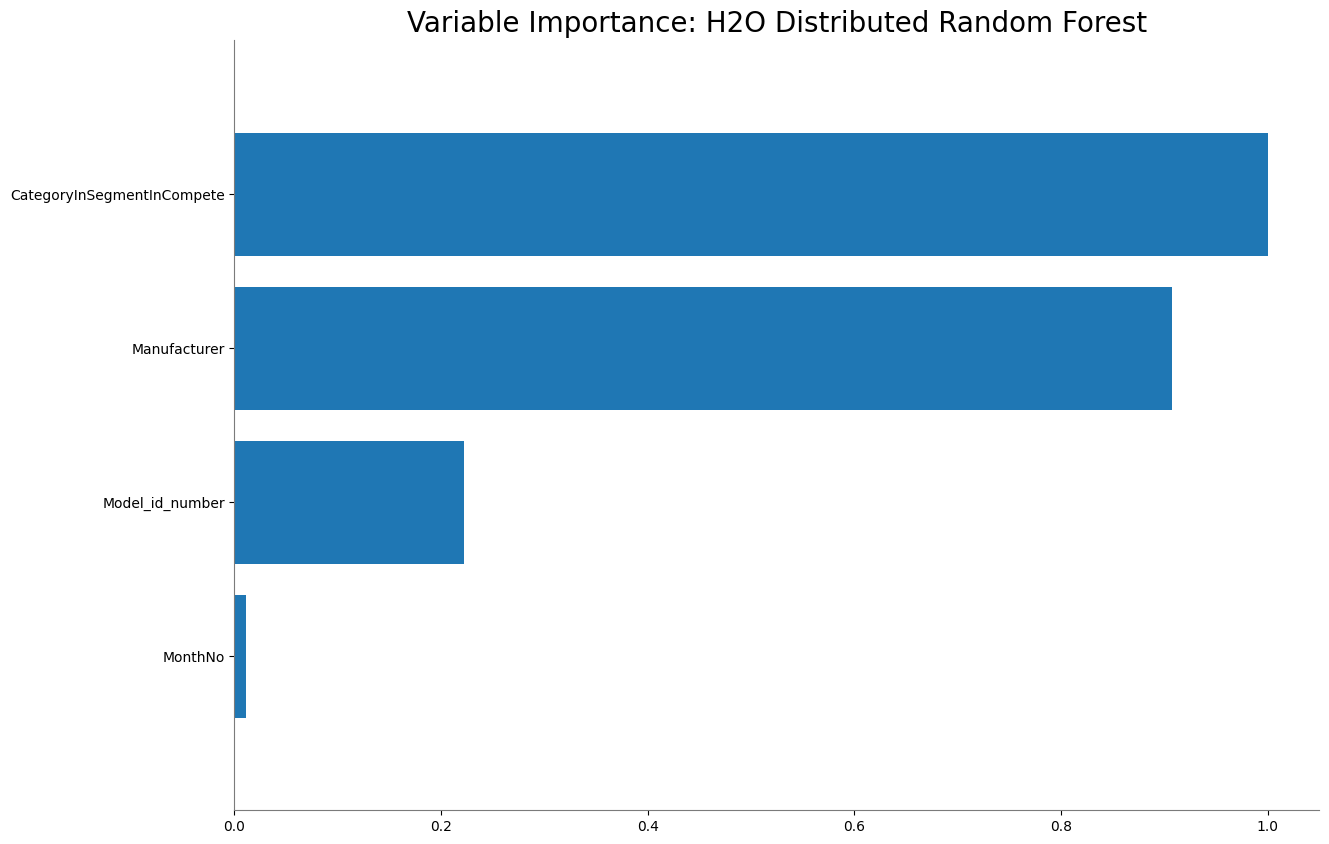

Model ID: XRT_1_AutoML_1_20231009_111939


<Figure size 640x480 with 0 Axes>

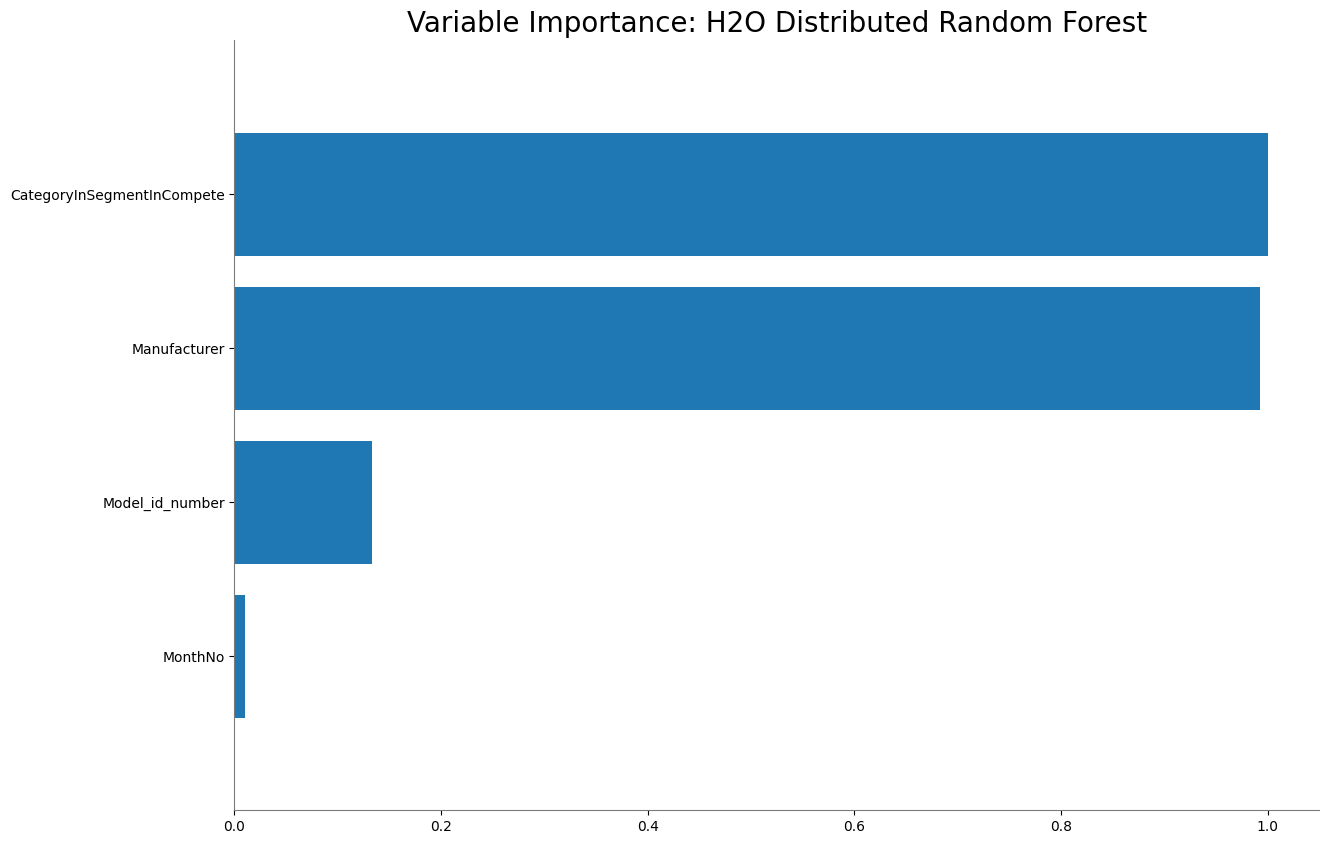

Model ID: GLM_1_AutoML_1_20231009_111939


<Figure size 640x480 with 0 Axes>

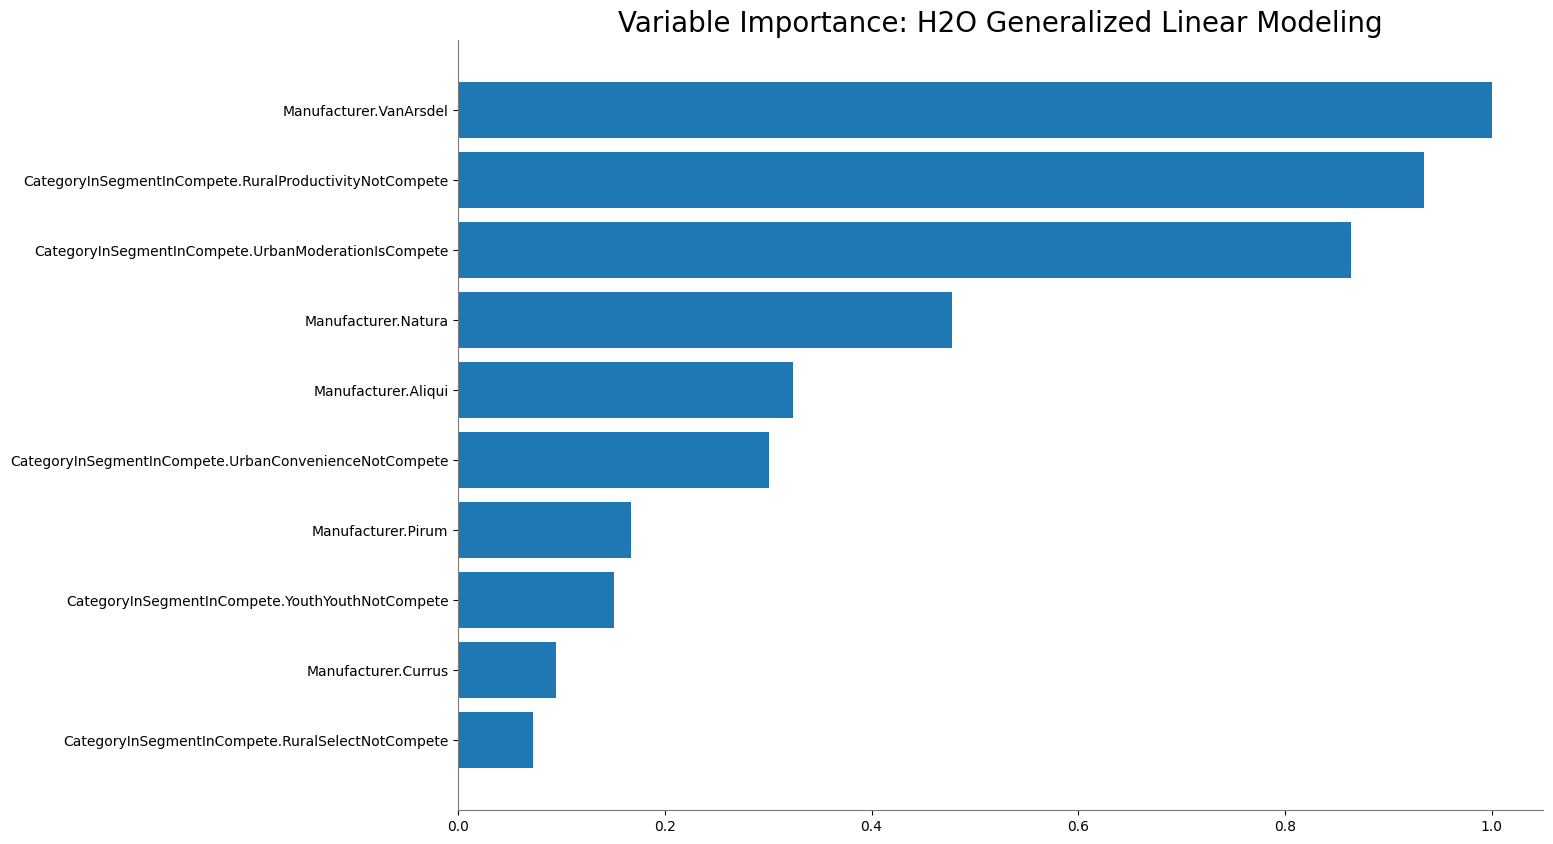

<Figure size 640x480 with 0 Axes>

In [15]:
for model_id in model_ids:
  try:
    print(f"Model ID: {model_id}")
    aml_unit = h2o.get_model(model_id)
    aml_unit.varimp_plot()
  except:
    print(f"{model_id} - ERROR PLOTTING") 

# Что с переобученносью

In [16]:
import pandas as pd
from sklearn.metrics import r2_score

for model_id in model_ids:
  try:
    print(f"Model ID: {model_id}")
    aml_unit = h2o.get_model(model_id)
    perf = aml_unit.model_performance(valid)
    print(perf)
    print(f"R2 cross validation: {aml_unit.r2()}")
    print(f"R2 test validation: {aml_unit.r2(valid=True)}")
    # прогноз лидирующей моделю на валидационной выборке
    val_pred=aml_unit.predict(unseen).as_data_frame()
    # из валидационного датасеат возбму столбец Stay и сконвертиую его в пандас датафрейм
    val_test = unseen['Revenue_T'].as_data_frame()
    r2_unseen = r2_score(val_test, val_pred)
    print(f"R2 unseen dataset validation: {r2_unseen}")
    print("-------------------\n-------------------")
  except:
    print(f"{model_id} - ERROR CALCULATE PERFOMANCE")

Model ID: StackedEnsemble_AllModels_1_AutoML_1_20231009_111939
ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 4798072.626180158
RMSE: 2190.4503249743325
MAE: 460.73078290456016
RMSLE: 0.15735186267245138
Mean Residual Deviance: 4798072.626180158
R^2: 0.7796889936130429
Null degrees of freedom: 156140
Residual degrees of freedom: 156136
Null deviance: 3400577240258.054
Residual deviance: 749175857924.396
AIC: 2845151.1462397752
R2 cross validation: 0.8114406628316069
R2 test validation: 0.7796889936130429
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
R2 unseen dataset validation: 0.79883797019213
-------------------
-------------------
Model ID: StackedEnsemble_BestOfFamily_1_AutoML_1_20231009_111939
ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 4807448.828208324
RMSE: 2192.5895256997655
MAE: 462.0746360104976
RMSLE: 0.15804840782580104
Mean Residual Deviance: 4807448.82820832

# Графии кривых обучения

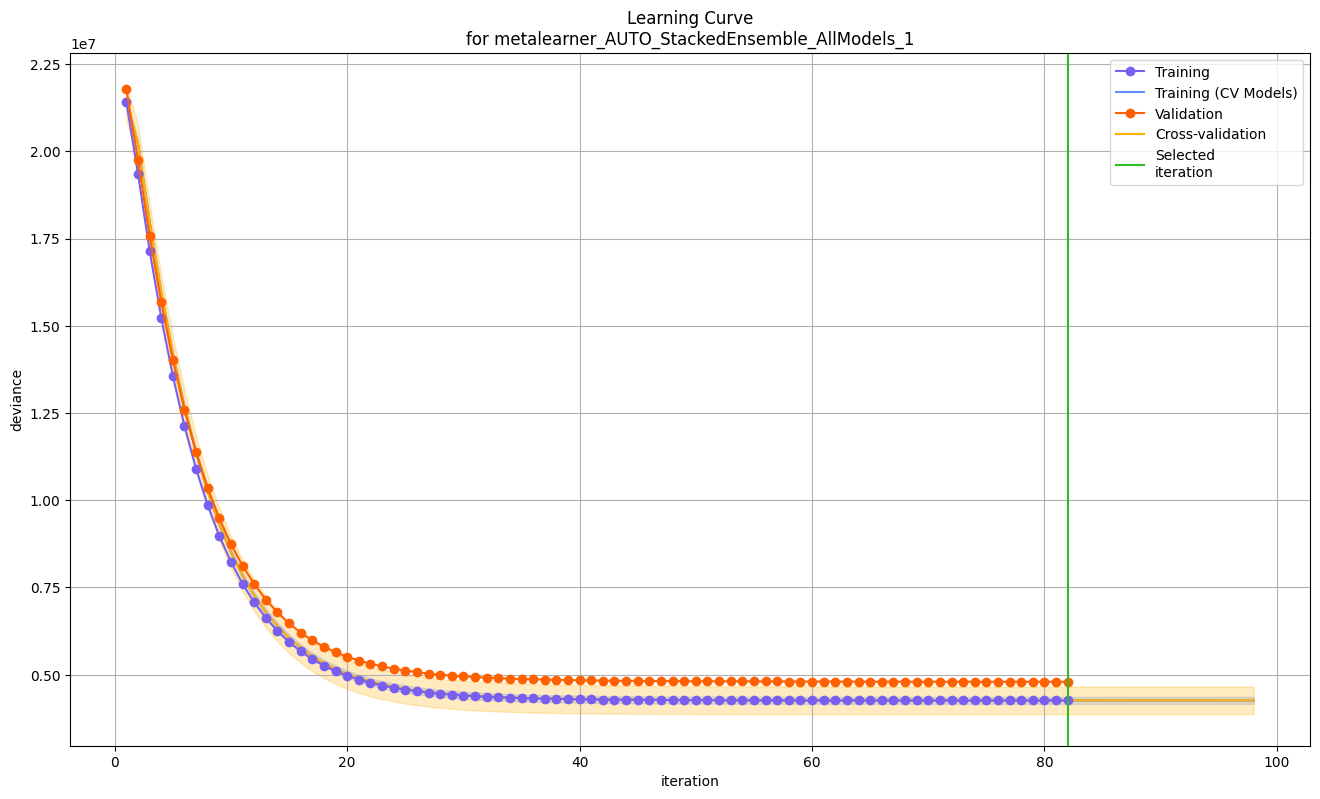

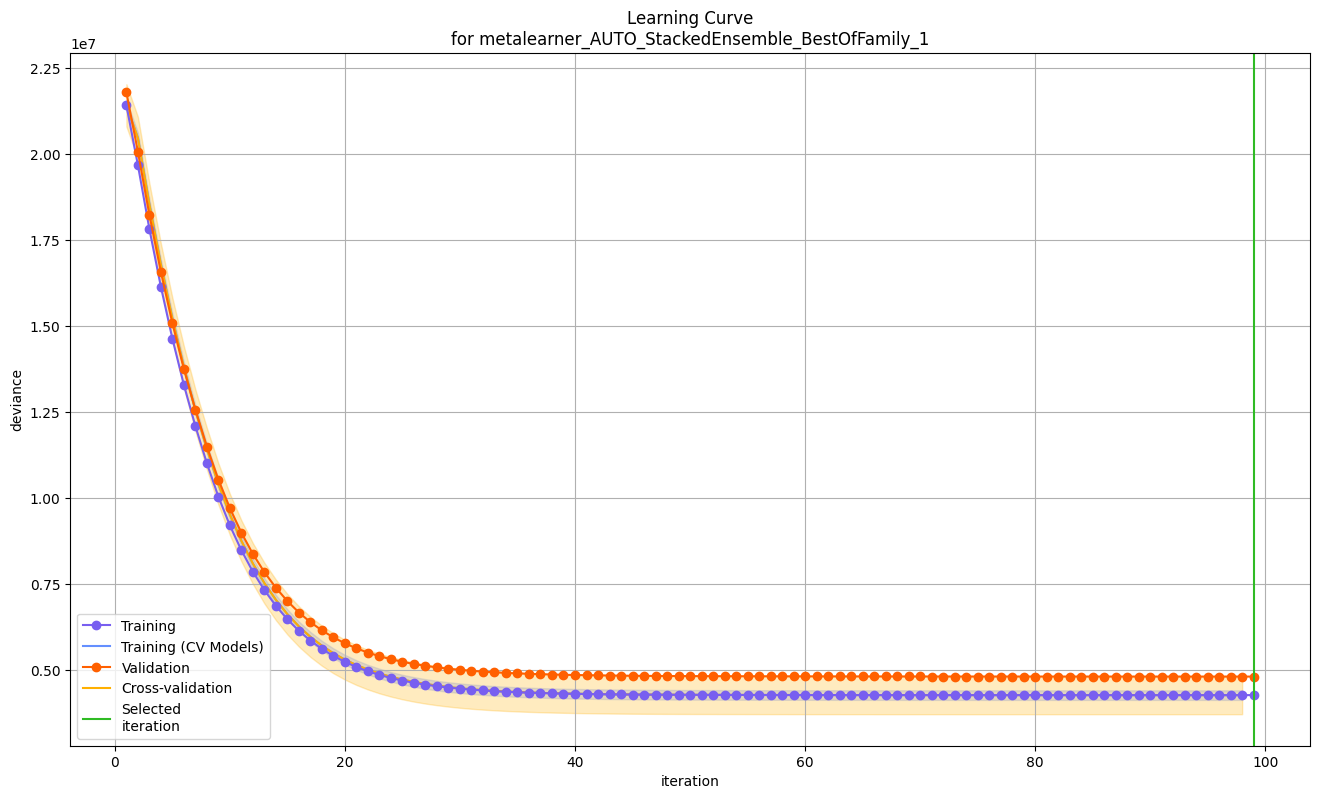

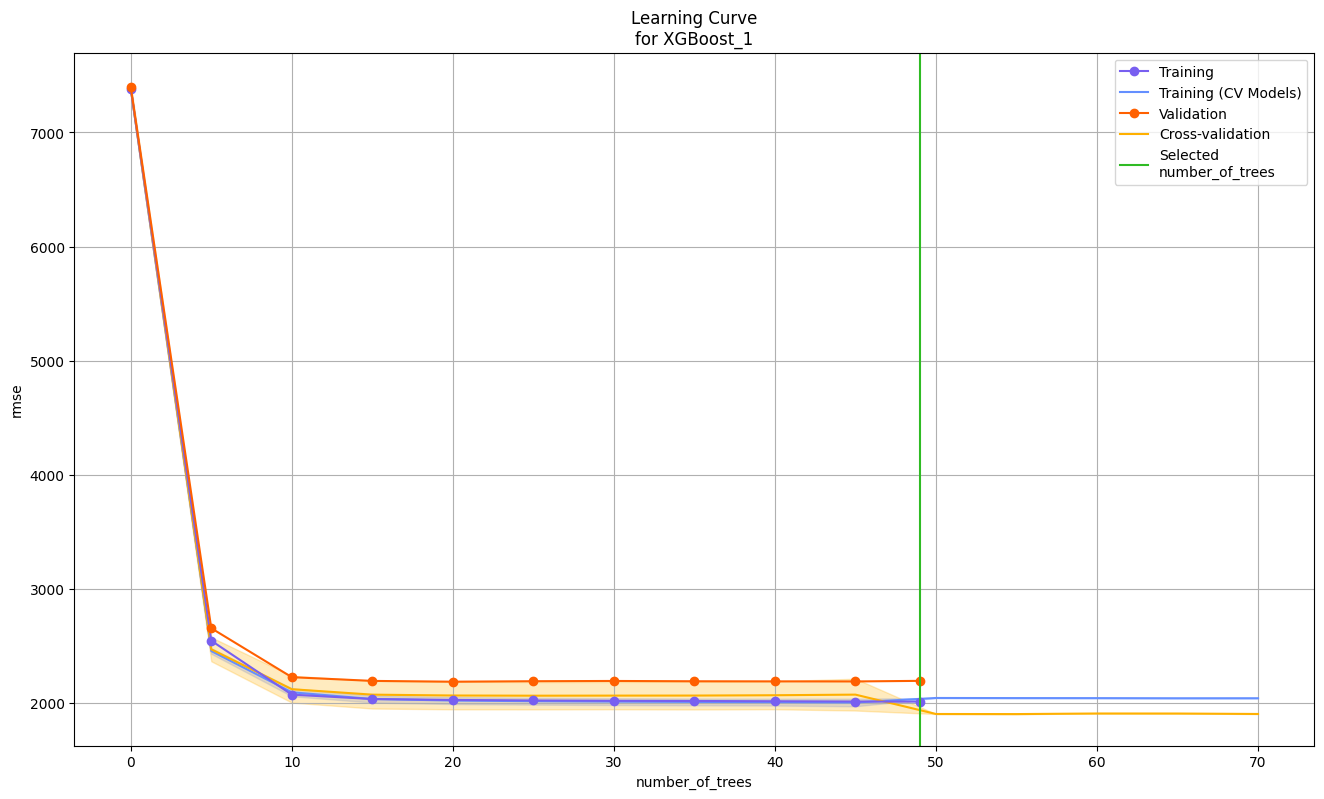

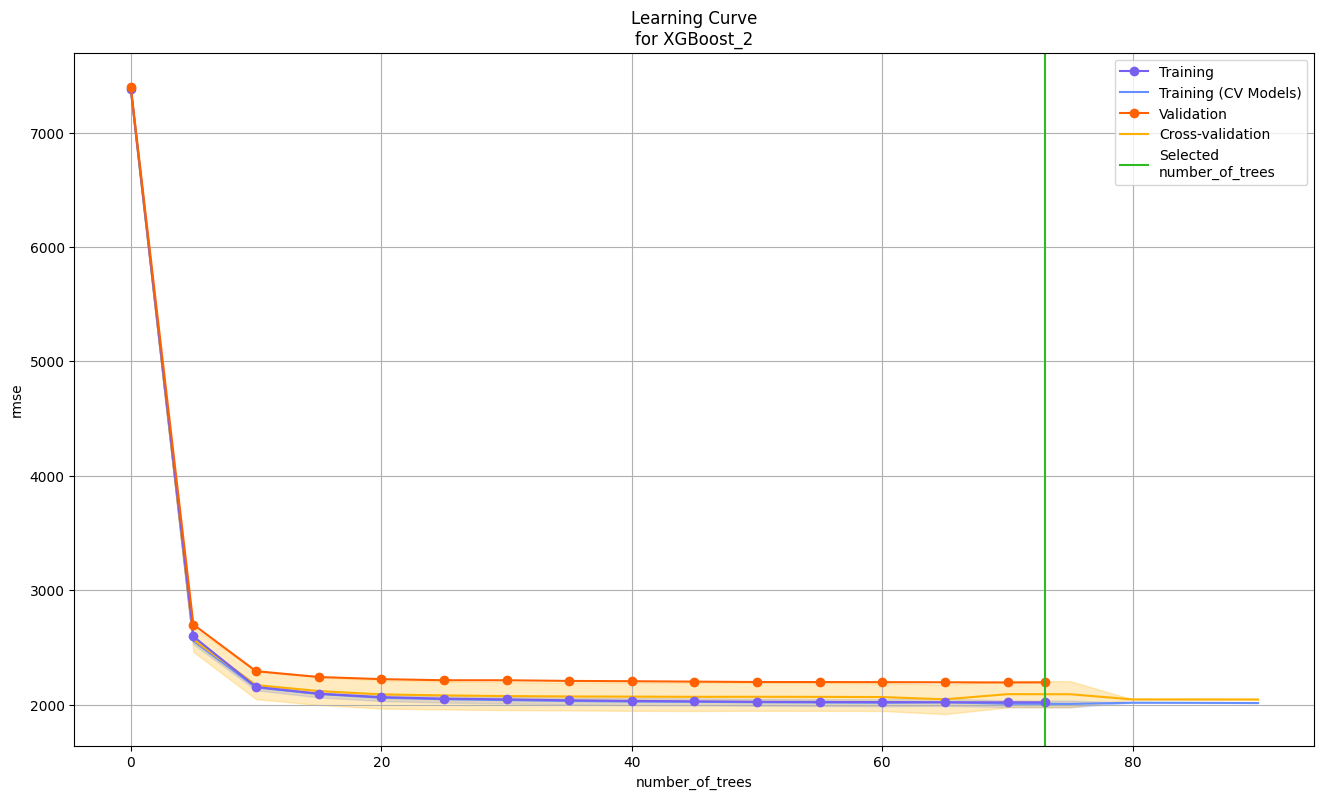

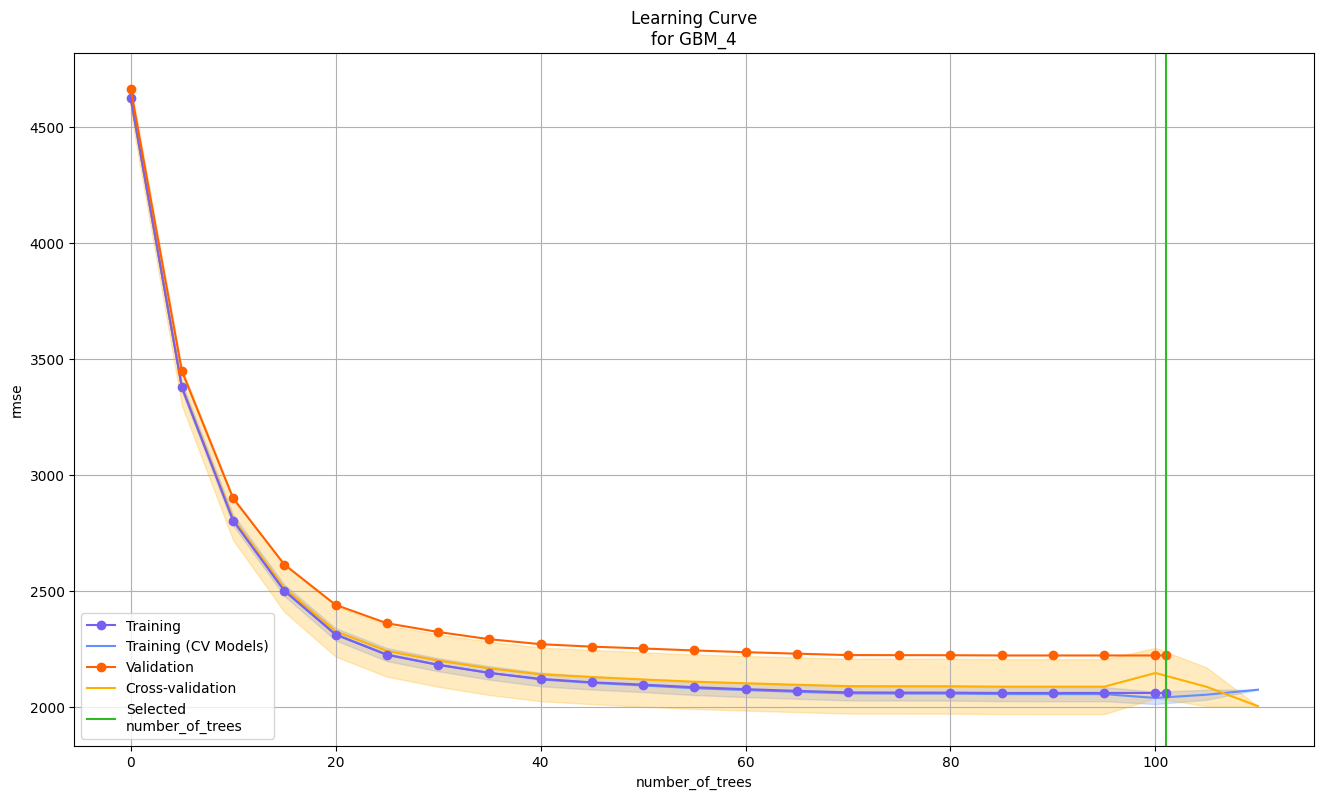

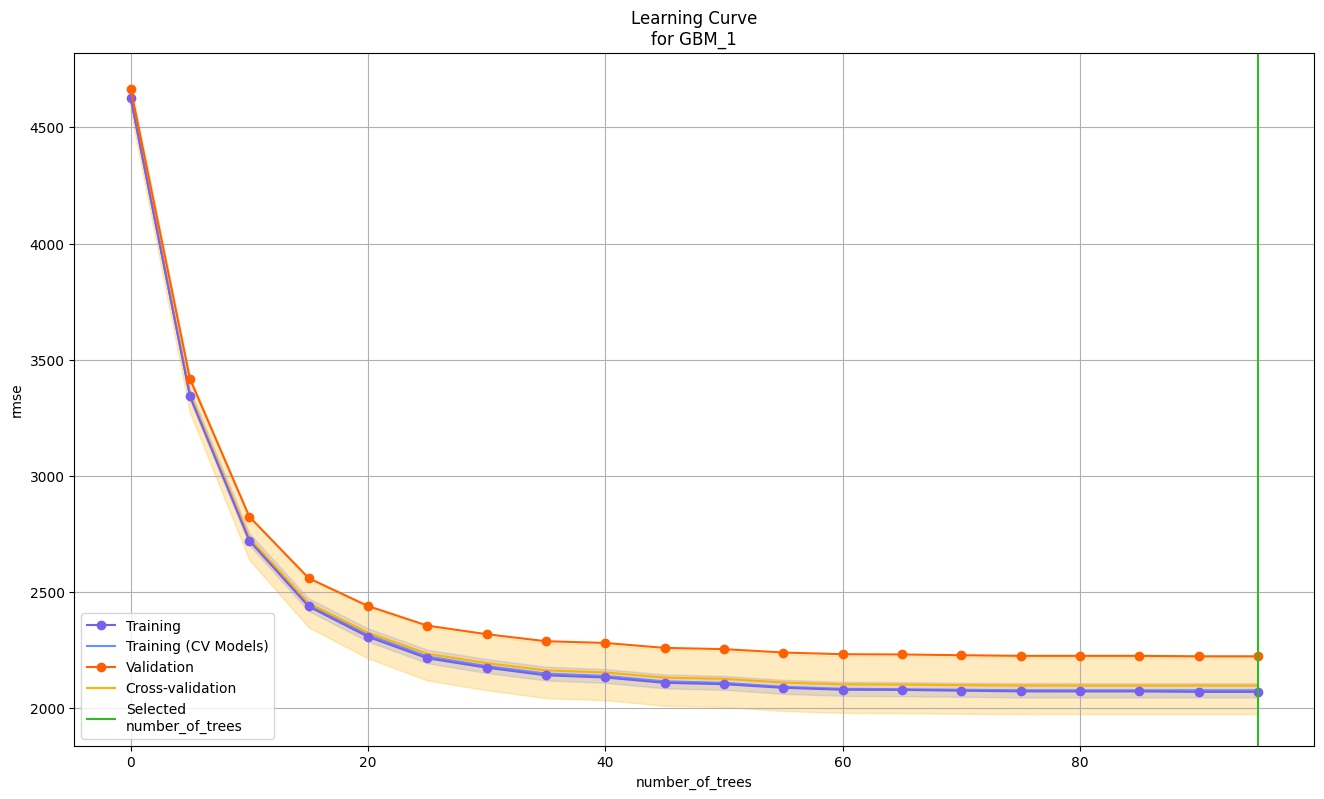

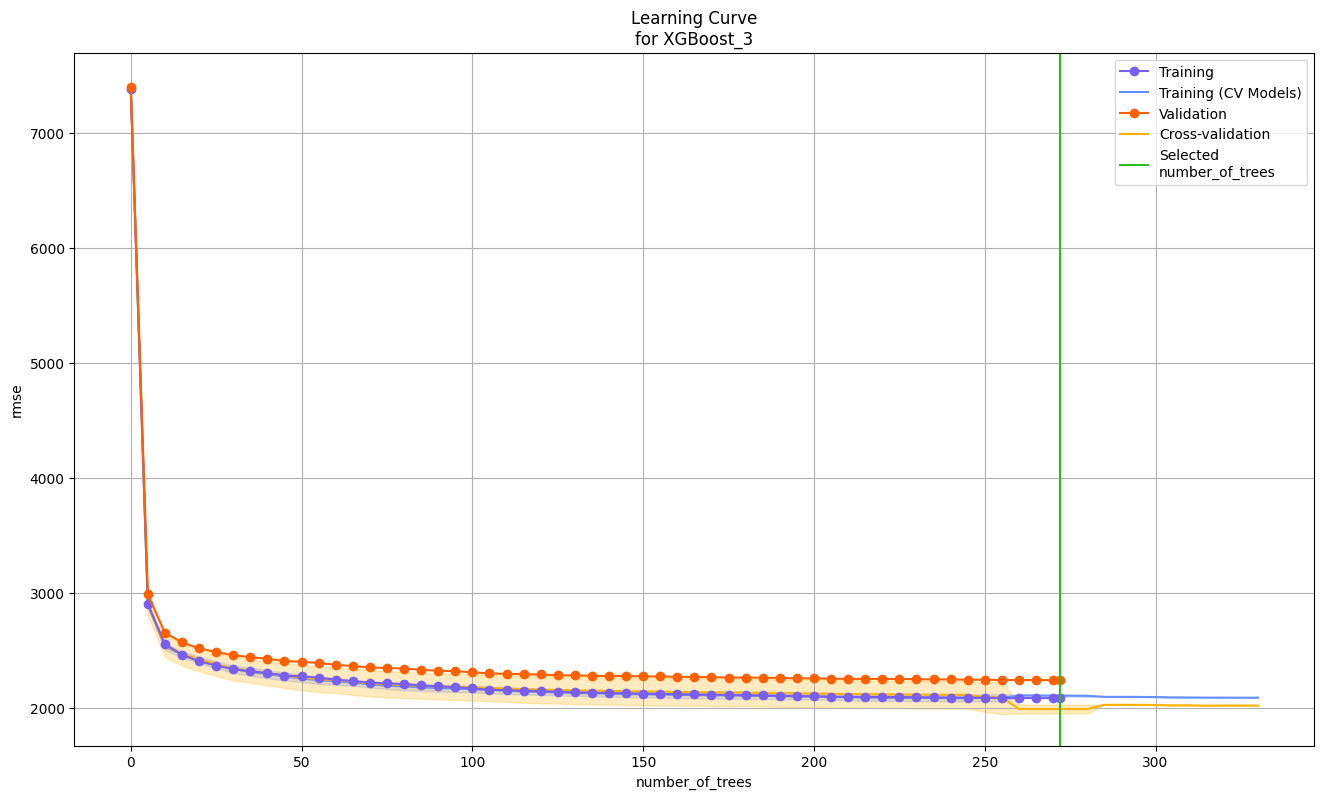

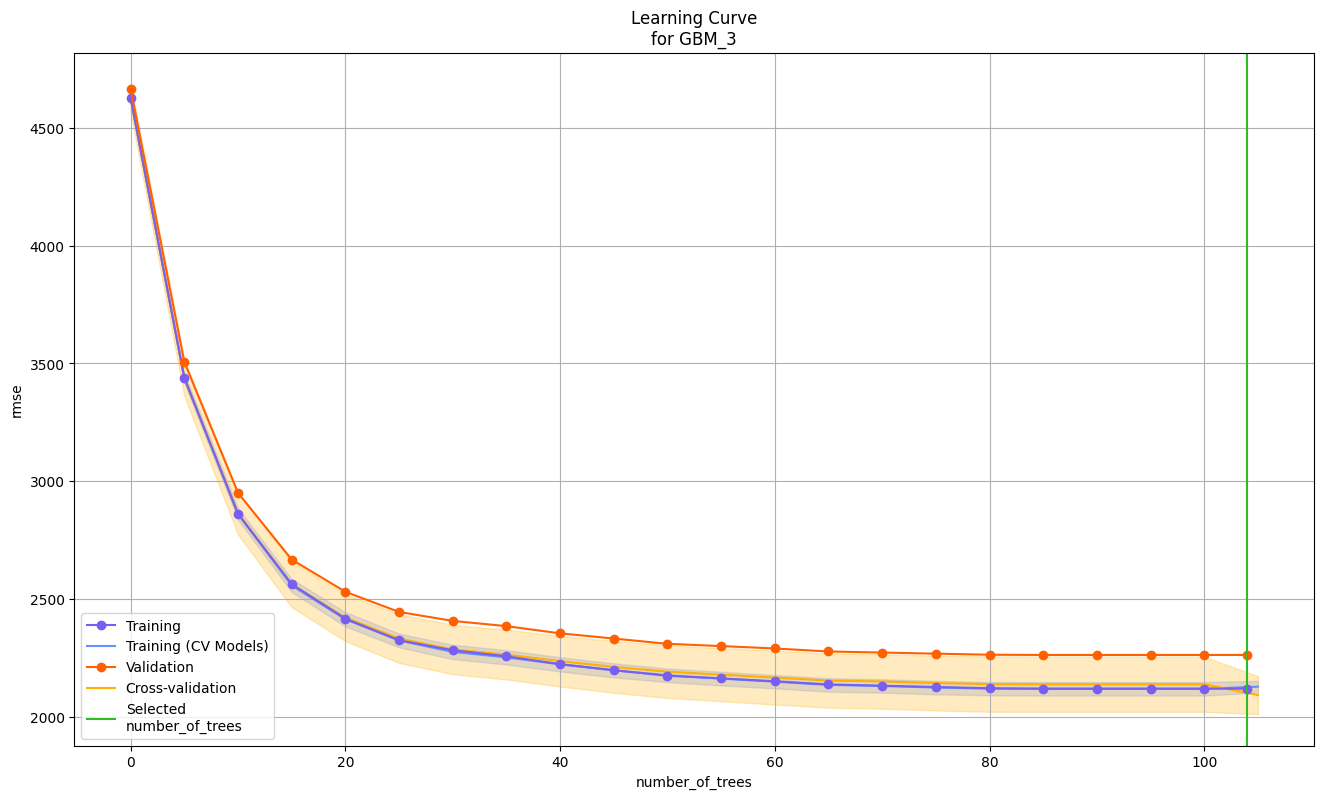

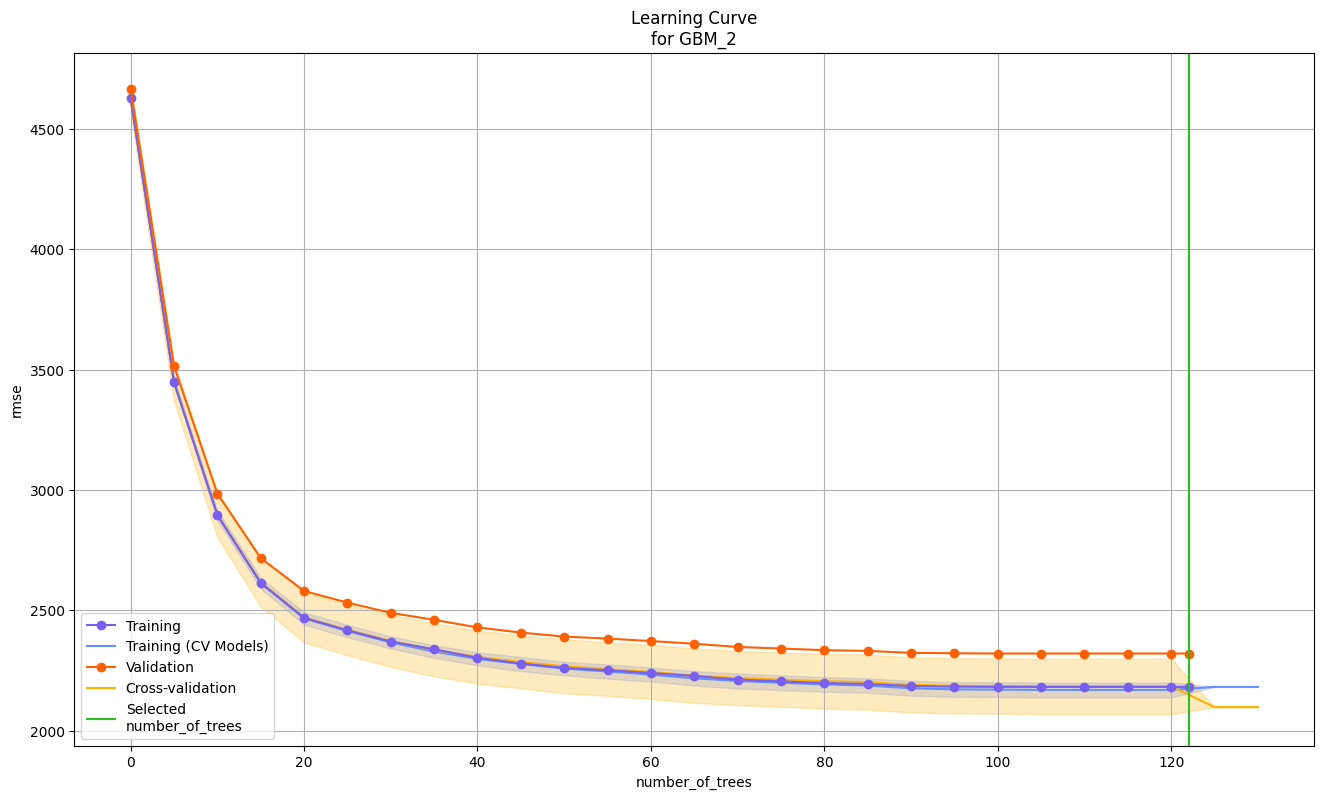

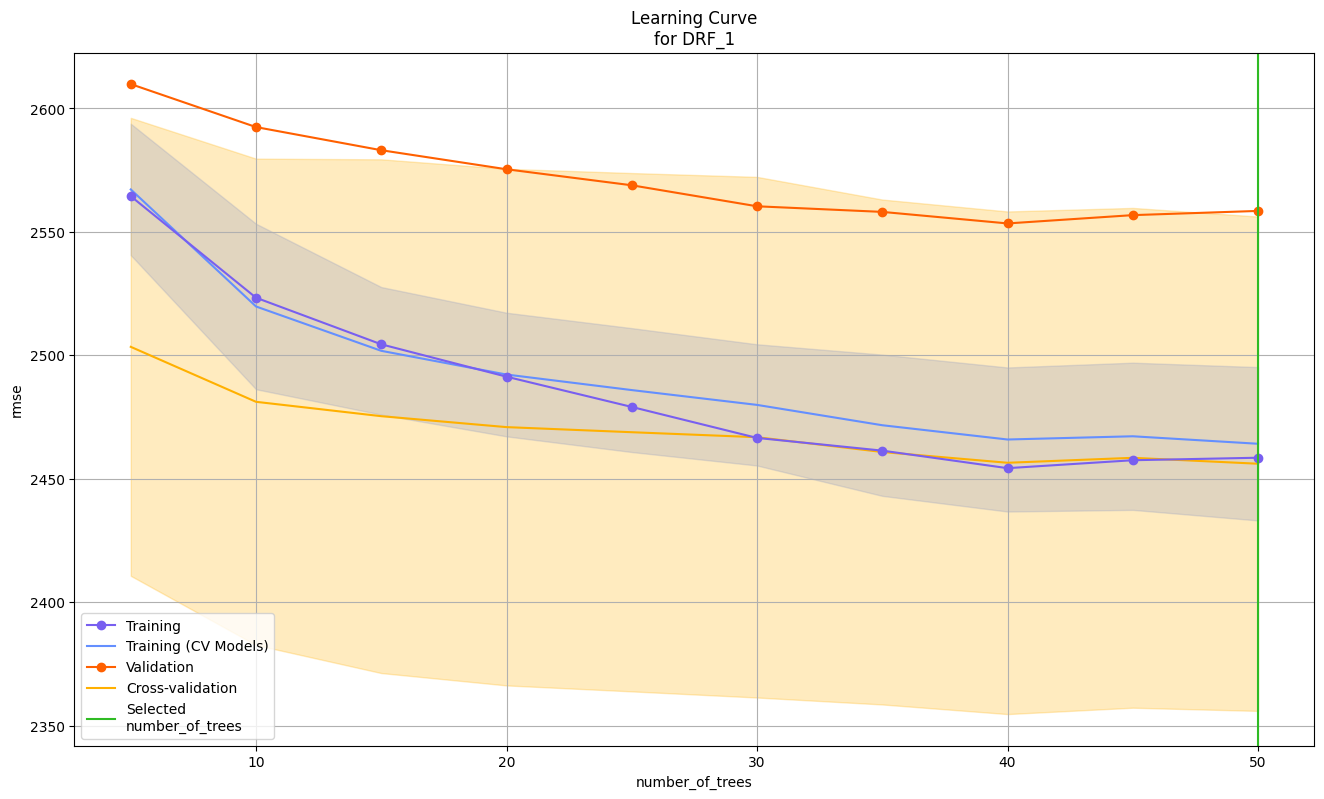

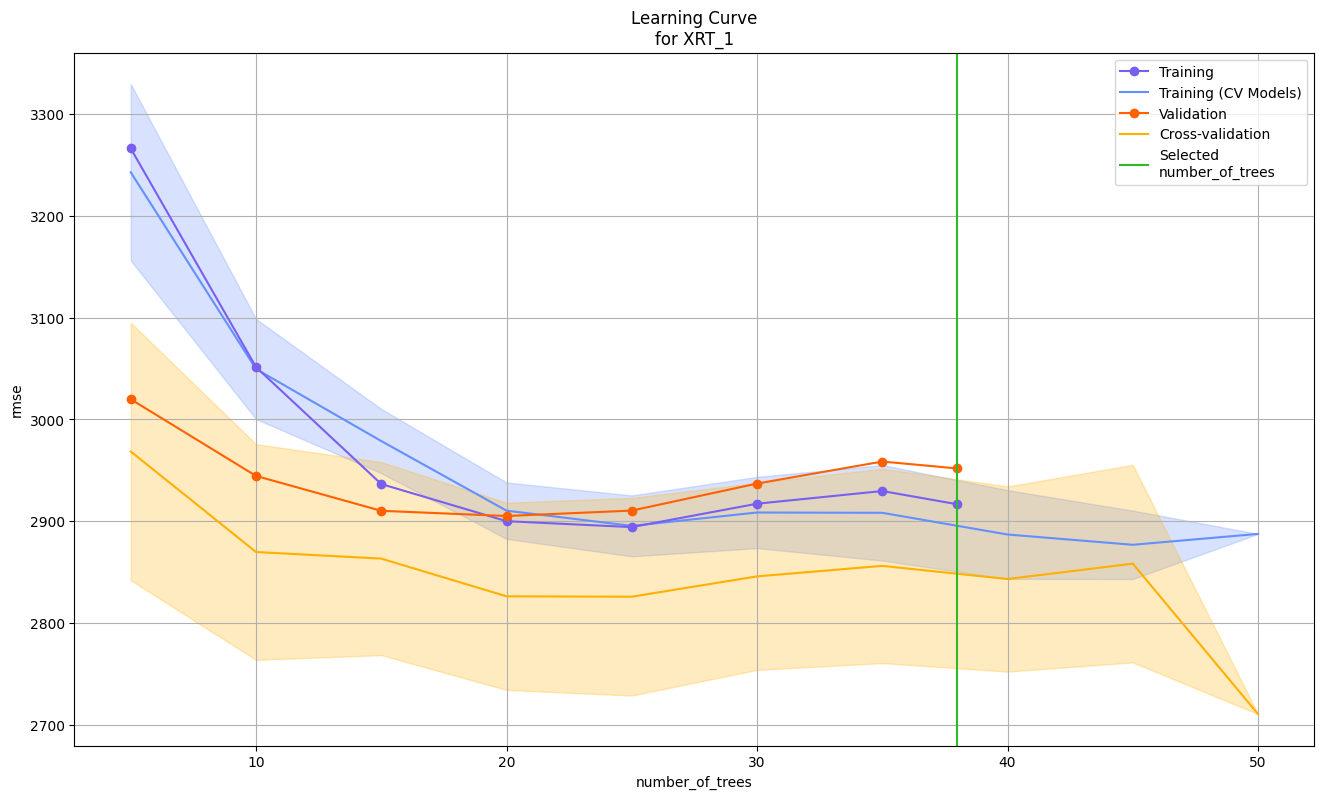

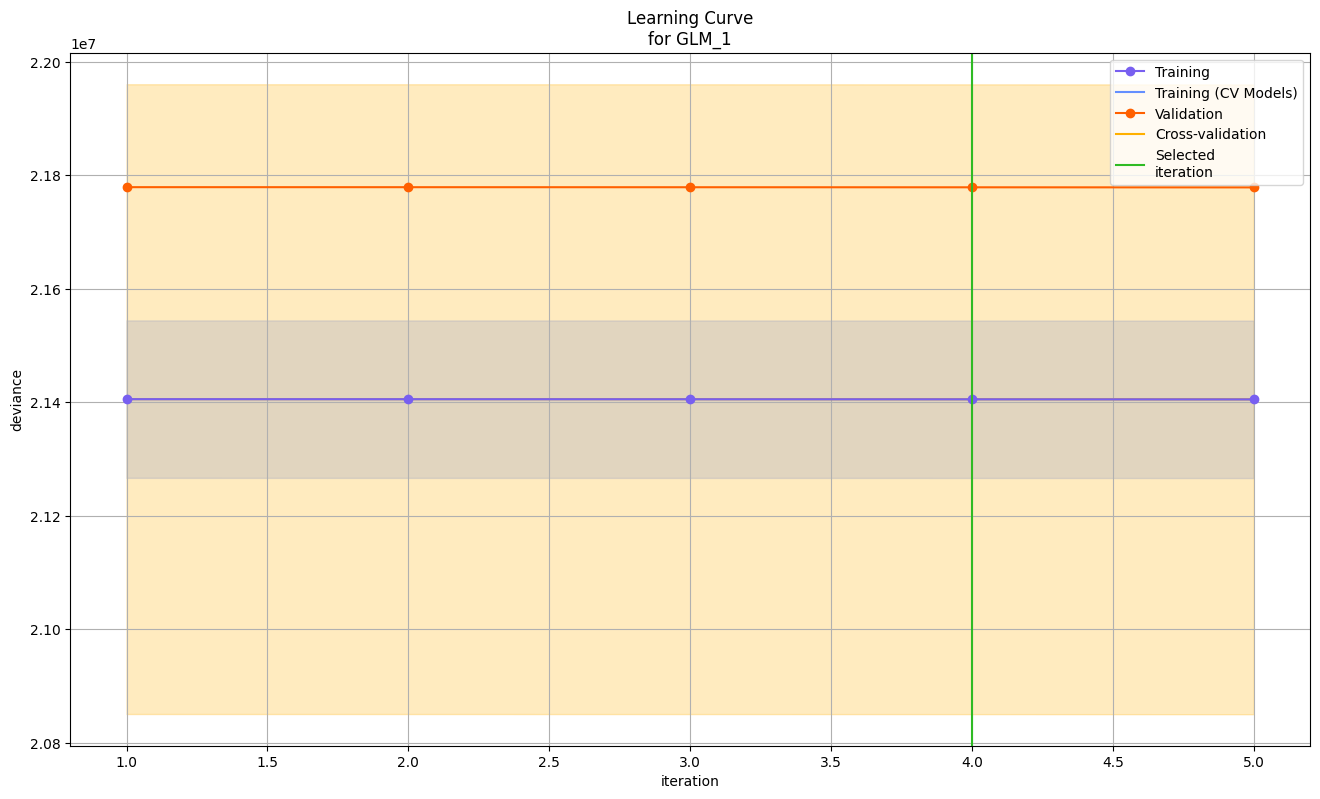

In [17]:
for model_id in model_ids:
  try:
    learning_curve_plot = h2o.get_model(model_id).learning_curve_plot()
  except:
    print(model_id, "- ERROR PLOT")

# Сохранение лучше модели

Довольно стаблильный показатель по Р-квадарт

In [20]:
besy_model_id = 'GBM_1_AutoML_1_20231009_111939'

In [21]:
# Сохранение лучшей модели
besy_model = h2o.get_model(besy_model_id)
h2o.save_model(besy_model, path = "./models")

'/home/jupyter/Diplom/models/GBM_1_AutoML_1_20231009_111939'